In [1]:
# To-do: check class GaussianProcessRegressor capbility of handling multiple outputs

In [7]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pylab as plt


import sys
sys.path.append('code')

from Kernel import Kernel, rbf_kernel, ICMKernel
from GaussianProcess import GaussianProcess

from jax.config import config
config.update('jax_enable_x64', True)

%matplotlib inline


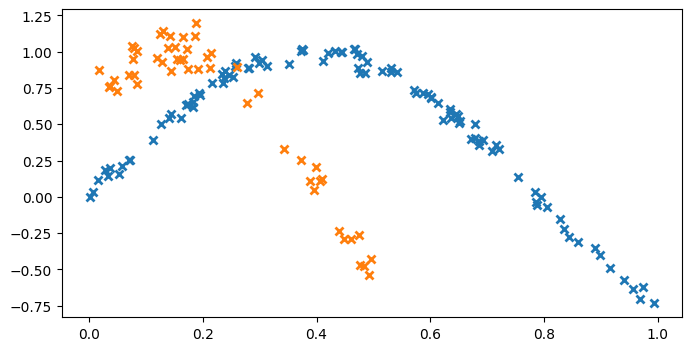

In [8]:
# most of this example code is taken from https://gpflow.readthedocs.io/en/v1.5.1-docs/notebooks/advanced/coregionalisation.html 
# with adpotions to the own GP implementation

X1 = np.random.rand(100, 1) # Observed locations for first output
X2 = np.random.rand(50, 1) * 0.5 # Observed locations for second output

Y1 = np.sin(4*X1) + np.random.randn(*X1.shape) * 0.04
Y2 = np.sin(6*X2+ 0.7) + np.random.randn(*X2.shape) * 0.1

plt.figure(figsize=(8, 4))
plt.plot(X1, Y1, 'x', mew=2)
plt.plot(X2, Y2, 'x', mew=2);

In [4]:
# Augment the input with ones or zeros to indicate the required output dimension
X_augmented = np.vstack((np.hstack((X1, np.zeros_like(X1))), np.hstack((X2, np.ones_like(X2)))))

# Augment the Y data
Y_augmented = np.vstack((np.hstack((Y1, np.zeros_like(Y1))), np.hstack((Y2, np.ones_like(Y2)))))

In [5]:
Num_params = 1
rbf = Kernel(rbf_kernel,Num_params, jnp.ones(Num_params), [(1e-5, 1e5)] * Num_params, kernel_name='rbf')
icm = ICMKernel(rbf,output_dim=2,rank=2)

In [ ]:
gp = GaussianProcess(kernel=icm, sigma_n=1e-5, is_mogp = True,output_dims =2, optimizer='adam')
gp.fit(X_augmented, Y_augmented)

In [6]:
xtest = np.linspace(0, 1, 100)[:,None]
ytest = np.sin(2*np.pi*xtest) + np.random.randn(100,1)*0.2

In [ ]:
def plot_gp(x, mu, var, color, label):
    plt.plot(x, mu, color=color, lw=2, label=label)
    plt.fill_between(x[:, 0],
                     (mu - 2*np.sqrt(var))[:, 0],
                     (mu + 2*np.sqrt(var))[:, 0],
                     color=color, alpha=0.4)

def plot(m):
    plt.figure(figsize=(8, 4))
    xtest = np.linspace(0, 1, 100)[:,None]
    line, = plt.plot(X1, Y1, 'x', mew=2)
    mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
    plot_gp(xtest, mu, var, line.get_color(), 'Y1')

    line, = plt.plot(X2, Y2, 'x', mew=2)
    mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
    plot_gp(xtest, mu, var, line.get_color(), 'Y2')

    plt.legend()

plot(m)